## Машинное обучение, ВМК МГУ, 318 группа, 2020 г.

## Практическое задание 1

### Общая информация
Дата выдачи: 19 февраля 2020 г.

Дедлайн: 4 марта 2020 г., 10:30

## О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии
- реализуете логистическую регрессию и её обучение градиентным спуском
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

Неэффективная реализация кода и несоблюдение стиля кодирования может негативно отразиться на оценке.

In [1]:
# %pylab inline

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=318)

__Задание 1.__ Обучение линейной регрессии.

Обучите линейную регрессию с $L_1$ (Lasso, http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) и $L_2$ (Ridge, http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [3]:
from sklearn.linear_model import Lasso, Ridge

In [4]:
lasso_n_zero_weights = []
ridge_n_zero_weights = []
log_space = np.logspace(-3, 3)

def get_n_nonzeros(weights, thr=10e-5):
    return (np.abs(weights) >= thr).sum()

for alpha in log_space:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    lasso_n_zero_weights.append(get_n_nonzeros(lasso_model.coef_))
    ridge_n_zero_weights.append(get_n_nonzeros(ridge_model.coef_))

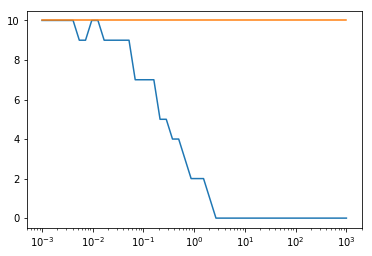

In [5]:
plt.xscale('log')
plt.plot(log_space, lasso_n_zero_weights)
plt.plot(log_space, ridge_n_zero_weights)

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_predict, KFold

In [7]:
params = {
    'alpha' : np.logspace(-3, 3)
}
cv = KFold(n_splits=5)
search = GridSearchCV(Ridge(), param_grid=params, n_jobs=-1, cv=cv)
search.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
preds = search.predict(X_test)

print('mse', mean_squared_error(y_test, preds))
print('mae', mean_absolute_error(y_test, preds))
print('r^2', r2_score(y_test, preds))

mse 2919.2398141032345
mae 42.70353591605331
r^2 0.482487139338291


__Задание 2.__ Поиск объектов-выбросов

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

mse : 3094.1714993837472


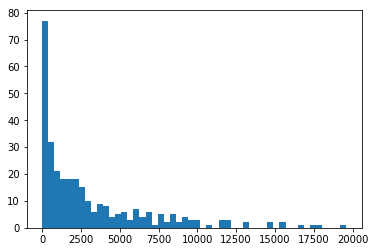

In [10]:
alpha = search.best_params_['alpha']
tr_preds = cross_val_predict(Ridge(alpha=alpha), X_train, y_train, cv=cv)
errors = (y_train - tr_preds) ** 2
print(f"mse : {errors.mean()}")
plt.hist(errors, bins=50);

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [11]:
thr = 7000
X_train_mod = X_train[errors <= thr]
y_train_mod = y_train[errors <= thr]

mse : 1818.819369415825


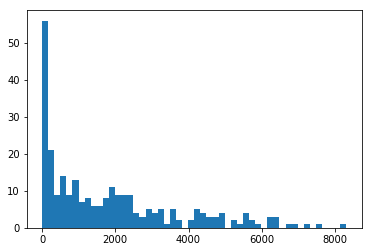

In [12]:
alpha = search.best_params_['alpha']
tr_preds_mod = cross_val_predict(Ridge(alpha=alpha), X_train_mod, y_train_mod, cv=cv)
errors_mod = (y_train_mod - tr_preds_mod) ** 2
print(f"mse : {errors_mod.mean()}")
plt.hist(errors_mod, bins=50);

## Часть 2. Логистическая регрессия

В этой части мы будем реализовывать один из самых простых бинарных классификаторов — логистическую регрессию и её обучение с помощью обычного (полного) и стохастического градиентных спусков.

Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). В случае стохастического градиентного спуска $\nabla_w Q(w, X) \approx \nabla_w q_{i_k} (w)$, где $i_k$ — случайно выбранный номер слагаемого из функционала (регуляризатор можно внести в сумму, предварительно умножив и разделив на $l$). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.

Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково. 

В качестве критерия останова необходимо использовать (одновременно):
- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max\_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Вероятность принадлежности объекта $x$ классу $+1$ вычисляется следующим образом:

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- \langle w, x \rangle )}
$$

Не забывайте, что матрицу объекты-признаки $X$ необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из 2 способов, разобранных на лекциях). Для этого можно воспользоваться StandardScaler или сделать это вручную.

В логистической регрессии также можно использовать $L_1$-регуляризацию. Тогда в функцию потерь добавится слагаемое $\lambda_1 \lVert w \rVert _1$. В формуле для вычисления градиента фукнции потерь по вектору коэффициентов это слагаемое будет соответствовать $\lambda_1 sgn(w)$, где $sgn$ — вычисление знака числа, применяемое к вектору коэффициентов поэлементо.

__Задание 1.__ Реализация обучения и применения логистической регресии c $L_2$-регуляризацией. 

Используйте для этого указанные ниже прототипы. Для эффективности все вычисления производите в векторизованной форме без циклов (кроме самих итераций градиентного спуска). Сгенерируйте с помощью функции make\_classification из модуля sklearn.datasets небольшую выборку для тестирования и исследования (выборка не должна быть слишком простой для классификации; также не забудьте проверить, что метки объектов из необходимого нам множества). Постройте следующие графики (для полного и стохастического градиентного спуска на одном графике):
- функции потерь от номера итерации обучения
- затраченного времени от номера итерации обучения

Возьмите параметр регуляризации $\lambda_2=1$, точность $tolerance=10^{-6}$, максимальное число итераций $max\_iter=1000$. Подберите оптимальную на ваш взгляд величину шага градиентного спуска. 

Сделайте выводы о том, чем различается на практике обучение с помощью стохастического градиентного спуска по сравнению с полным градиентным спуском.

В этом задании не обращайте внимания на $\lambda_1$, соответствующий $L_1$-регуляризации.

Для численной устойчивости вам могут быть полезны функции: scipy.special.expit и numpy.logaddexp.

In [13]:
class LogReg(BaseEstimator):
    def __init__(self, lambda_1=0.0, lambda_2=1.0, gd_type='stochastic', 
                 tolerance=1e-6, max_iter=1000, w0=None, alpha=1e-3, verbose=0):
        """
        lambda_1: L1 regularization param
        lambda_2: L2 regularization param
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        alpha: learning rate
        """
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.loss_history = None
        self.verbose = verbose
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        l, d = X.shape
        y = y.reshape(-1, 1)
        st_index = 0
        self.loss_history = []
        
        if self.w is None:
            self.w = 0.1 * np.random.rand(d, 1)
        
        for i in range(self.max_iter):
            if self.gd_type == 'stochastic':
                grad = self.calc_gradient(X[st_index].reshape((1, d)), y[st_index])
                st_index = (st_index + 1) % l
            else:
                grad = self.calc_gradient(X, y)
            
            grad *= self.alpha
            self.w -= grad
            
            loss = self.calc_loss(X, y)
            self.loss_history.append(loss)
            
            if np.linalg.norm(grad) < self.tolerance and i > 5:
                print(f'learning has stopped at iteration {i}')
                break

            if self.verbose:
                print(f"loss : {loss}")
        
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        probs = 1 / (1 + np.exp(-X @ self.w))
        return np.concatenate([1 - probs, probs], axis=1)
    
    def predict(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 1) where
        first column has predicted labels of samples from X
        """
        return self.predict_proba(X).argmax(axis=1)
    
    def score(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: default accuracy score
        """
        preds = self.predict(X)
        return (preds.reshape(-1) == y).mean()
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        reg = self.lambda_2 * self.w
        tmp = -np.sum((y * X) / (1 + np.exp(y * (X @ self.w))), axis=0).reshape(-1, 1)
        grad = 1 / X.shape[0] * tmp + reg
        return grad

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)
        reg = self.lambda_2 / 2 * np.sum(model.w ** 2)
        k = np.log(1 + np.exp(-y * (X @ self.w)))
        return 1 / X.shape[0] * np.sum(k) + reg

In [14]:
from sklearn.datasets import make_classification
X, target = make_classification(n_samples=1000)
y = target.copy()#.reshape(-1, 1)
y[y == 0] = -1
X = (X - X.mean()) / X.std()

In [15]:
model = LogReg(alpha=0.0005, lambda_2=1)
model.fit(X, y)

LogReg(alpha=0.0005, gd_type='stochastic', lambda_1=0.0, lambda_2=1,
       max_iter=1000, tolerance=1e-06, verbose=0, w0=None)

In [16]:
model.score(X, target)

0.877

In [17]:
model = LogReg(alpha=0.001, lambda_2=1, gd_type='full')
model.fit(X, y)

LogReg(alpha=0.001, gd_type='full', lambda_1=0.0, lambda_2=1, max_iter=1000,
       tolerance=1e-06, verbose=0, w0=None)

In [18]:
model.score(X, target)

0.903

__Выводы:__ стохастический градиентный спуск сходится быстрее

__Задание 2.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

Полезные функции и классы из scikit-learn для этого задания: confusion_matrix, precision_recall_curve, average_precision_score, train_test_split, StandardScaler, roc-curve, roc_auc_score.

In [19]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, \
    average_precision_score, roc_curve, roc_auc_score

Возьмём данные конкурса [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [20]:
data = pd.read_csv('porto-seguro-safe-driver-prediction/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
pd.value_counts(target)

0    573518
1     21694
dtype: int64

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.

In [21]:
# some resampling
np.random.seed(910)
thr = len(np.where(target == 1)[0])

mask_plus = np.random.choice(np.where(target == 1)[0], thr, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], thr, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [22]:
pd.value_counts(target)

1    21694
0    21694
dtype: int64

Не забудьте отнормировать признаки (можно воспользоваться StandardScaler или сделать это вручную). Пока не будем обращать внимание на то, что некоторые признаки категориальные (этим мы займёмся позже).

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_mod = y_train.copy()
y_train_mod[y_train_mod == 0] = -1

y_test_mod = y_test.copy()
y_test_mod[y_test_mod == 0] = -1

In [24]:
X_train.shape, y_train_mod.shape

((21694, 57), (21694,))

In [25]:
model = LogReg(alpha=0.001, lambda_2=0.3, max_iter=10000)#, verbose=True)
model.fit(X_train, y_train_mod)

LogReg(alpha=0.001, gd_type='stochastic', lambda_1=0.0, lambda_2=0.3,
       max_iter=10000, tolerance=1e-06, verbose=0, w0=None)

In [26]:
model.score(X_test, y_test)

0.5873974370793767

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

In [27]:
predictions = model.predict_proba(X_test)[:, 1]

In [28]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

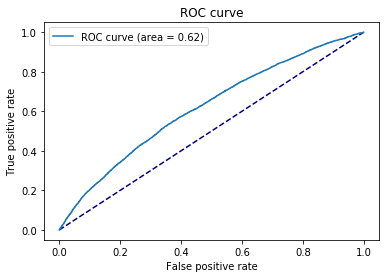

In [29]:
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend()

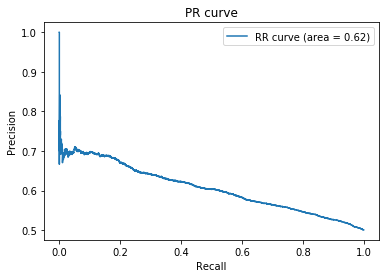

In [30]:
pr, re, thr = precision_recall_curve(y_test, predictions)
pr_auc = auc(fpr, tpr)

plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(re, pr, label='RR curve (area = %0.2f)' % pr_auc)
plt.legend()

Предположим, что наш алгоритм должен обеспечивать полноту не менее 0.7. Какому порогу бинаризации вероятностей это будет соответствовать? Какую точность (precision) мы получим? Постройте матрицу ошибок для данного порога. Что вы можете сказать о таком алгоритме? (В свободной форме)

In [31]:
i = 7500
threshold = thr[i]
print(f"recall : {re[i]:.3f}, precision : {pr[i]:.3f}, threshold : {threshold:.3f}")
print('confusion matrix : ')
print(confusion_matrix(y_test, predictions >= threshold))

recall : 0.700, precision : 0.564, threshold : 0.470
confusion matrix : 
[[4958 5870]
 [3261 7605]]


__Задание 3.__ Изучение влияния регуляризатора на процесс обучения

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, запускайте процесс обучения логистической регрессии с параметром $max\_iter=1$ и $w^{(0)}$, полученным на предыдущей итерации. Постройте два графика: на одном из них логистическая регрессия с коэффициентом регуляризации, равным 0, а на другом с некоторым разумным значением. На каждом графике одновременно должна быть и функция потерь для обучающей, и для тестовой выборки. Не забудьте сделать одинаковыми оси обоих графиков. Какие выводы вы можете сделать?

In [32]:
lambdas = [0, 0.05, 2.5, 10]
val_losses = []
train_losses = []

for i, l2 in enumerate(lambdas):
    w0 = 0.01 * np.random.rand(X_train.shape[1], 1)
    
    tr_loss = []
    val_loss = []
    for i in range(50):
        m = LogReg(alpha=0.01, w0=w0, lambda_2=l2, max_iter=1)
        m.fit(X_train, y_train_mod)
        
        tr_loss.append(m.loss_history[-1])
        val_loss.append(m.calc_loss(X_test, y_test_mod))
        w0 = m.w0
    train_losses.append(tr_loss)
    val_losses.append(val_loss)


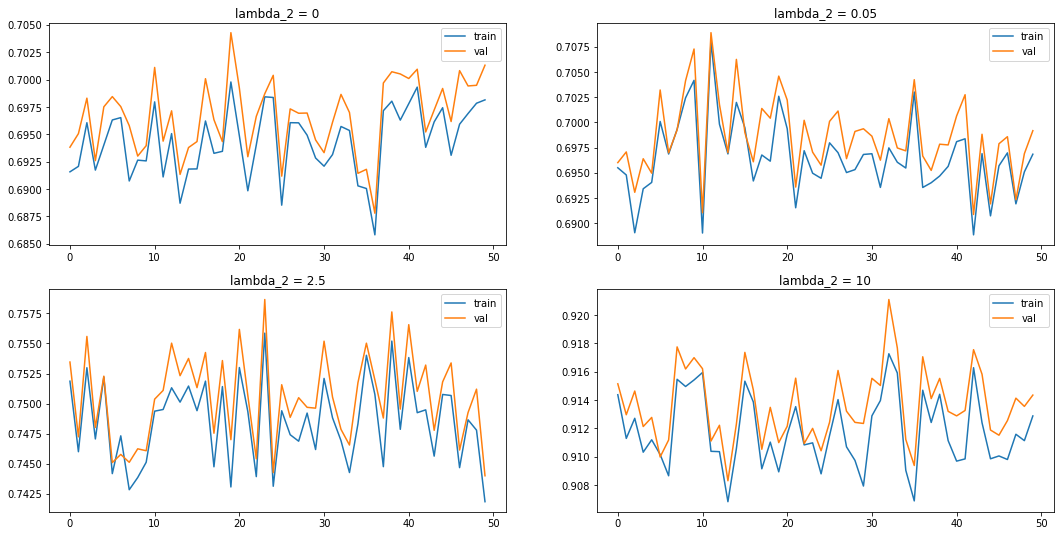

In [33]:
fig = plt.figure(figsize=(18, 9))
for i, l2 in enumerate(lambdas, start=1):    
    ax = fig.add_subplot(2, 2, i)
    ax.set_title(f'lambda_2 = {l2}')
    ax.plot(train_losses[i-1], label='train')
    ax.plot(val_losses[i-1], label='val')
    ax.legend()


## Часть 3. Метод опорных векторов

__Задание 1.__ Обучение и применение метода опорных векторов.

Обучите метод опорных векторов (в этот раз воспользуйтесь готовой реализацией LinearSVC из sklearn). Используйте уже загруженные и обработанные в предыдущей части данные.

In [34]:
from sklearn.svm import LinearSVC
m = LinearSVC()
m.fit(X_train, y_test)
m.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5080667465658707

На той же тестовой части посчитайте все те же метрики. Что вы можете сказать о полученных результатах?

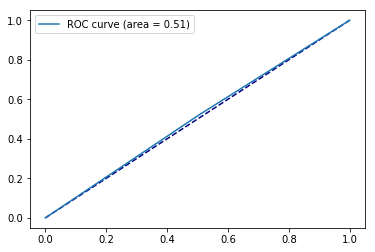

In [35]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, m.predict(X_test), pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend()

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов с линейным ядром. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром, так как только в нём есть информация об опорных векторах.

In [36]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0)
# X = (X - X.mean()) / X.std()

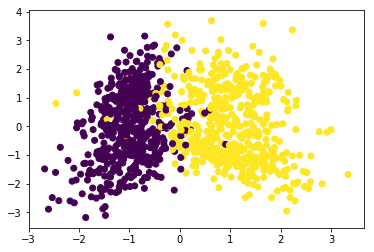

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [38]:
from sklearn.svm import SVC
m = SVC(kernel='linear')
m.fit(X, y)
m.score(X, y)

0.946

No handles with labels found to put in legend.


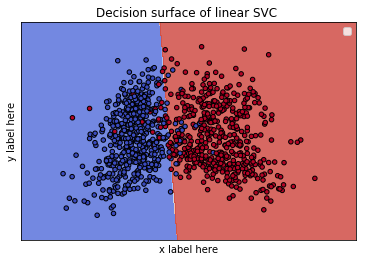

In [39]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, m, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Задание 1.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было ранее). Измерьте время, потребовавшееся на обучение модели.

In [40]:
data.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,43388.000000,43388.000000,43388.000000,43388.000000,43388.000000,43388.000000,43388.000000,43388.000000,43388.000000,43388.000000,...,43388.000000,43388.000000,43388.000000,43388.000000,43388.000000,43388.00000,43388.000000,43388.000000,43388.000000,43388.000000
mean,1.994538,1.372430,4.489536,0.429381,0.507606,0.353254,0.293814,0.175901,0.177031,0.000369,...,5.458445,1.433138,2.866668,7.549507,0.121347,0.62538,0.554877,0.290403,0.346916,0.149811
std,2.009495,0.684539,2.751626,0.496621,1.510136,0.477986,0.455513,0.380740,0.381699,0.019200,...,2.349889,1.199806,1.694604,2.754993,0.326534,0.48403,0.496985,0.453954,0.475994,0.356890
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,7.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000
max,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,16.000000,8.000000,13.000000,20.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [41]:
data.dtypes[data.dtypes == 'float']

ps_reg_01     float64
ps_reg_02     float64
ps_reg_03     float64
ps_car_12     float64
ps_car_13     float64
ps_car_14     float64
ps_car_15     float64
ps_calc_01    float64
ps_calc_02    float64
ps_calc_03    float64
dtype: object

In [42]:
for i in data.columns[data.dtypes == 'float']:
    print(pd.value_counts(data[i]))

0.9    15189
0.7     5031
0.8     4527
0.6     4061
0.4     3765
0.3     2772
0.1     2583
0.5     2271
0.2     1601
0.0     1588
Name: ps_reg_01, dtype: int64
0.2    7564
0.3    6728
0.0    6264
0.4    4315
0.5    2748
0.6    2669
0.1    1910
0.7    1645
0.8    1621
0.9    1431
1.2    1374
1.0    1012
1.3     961
1.1     953
1.4     559
1.8     484
1.6     469
1.5     447
1.7     234
Name: ps_reg_02, dtype: int64
-1.000000    6878
 0.633936      61
 0.680074      52
 0.606733      51
 0.701338      50
 0.668487      49
 0.556776      49
 0.524404      48
 0.596343      47
 0.643720      46
 0.600000      46
 0.669888      45
 0.664737      45
 0.731864      44
 0.774193      43
 0.615934      43
 0.684197      42
 0.696419      42
 0.517204      42
 0.694172      42
 0.630476      42
 0.835165      41
 0.602080      41
 0.602599      41
 0.592136      41
 0.621993      41
 0.583095      41
 0.557898      40
 0.619476      40
 0.740355      39
             ... 
 1.562050       1
 1.210

In [43]:
data = pd.read_csv('porto-seguro-safe-driver-prediction/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
pd.value_counts(target)

np.random.seed(910)
thr = len(np.where(target == 1)[0])

mask_plus = np.random.choice(np.where(target == 1)[0], thr, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], thr, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

numeric_features = data.columns[data.dtypes == 'float']
categorical_features = [i for i in data.columns if i not in numeric_features]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [46]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearSVC())])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5930672075228174

In [47]:
clf_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogReg(alpha=0.001, lambda_2=0.1, verbose=1))])
y_train_m = y_train.copy()
y_train_m[y_train_m == 0] = -1
clf_logreg.fit(X_train, y_train_m)

loss : 1.1917140974293066
loss : 1.1923740323458454
loss : 1.1929769539540052
loss : 1.1944008324204776
loss : 1.1858369958024915
loss : 1.1870333282854373
loss : 1.177846169770748
loss : 1.178678132531037
loss : 1.1799104689316595
loss : 1.180485006479072
loss : 1.1716067181537257
loss : 1.1630820394534114
loss : 1.1639248567659566
loss : 1.1649247857740515
loss : 1.1566873280508532
loss : 1.1574389061373351
loss : 1.1488546662348773
loss : 1.1403339048010215
loss : 1.1412819293579222
loss : 1.1423063037295569
loss : 1.1335252600841905
loss : 1.1342590928270857
loss : 1.1353463443384986
loss : 1.1276242862145553
loss : 1.1198980932732567
loss : 1.1208942800579038
loss : 1.122179467541317
loss : 1.1141565568253904
loss : 1.1147147615727069
loss : 1.1158525865766427
loss : 1.107416782352032
loss : 1.0988438398555553
loss : 1.1000498639692033
loss : 1.0922562396181468
loss : 1.0852317262581412
loss : 1.0862250981304253
loss : 1.0871135896920834
loss : 1.087928942756609
loss : 1.088701351

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [48]:
clf_logreg.score(X_test, y_test)

0.5669309486493962

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 2.__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментов. Заметили ли вы что-то интересное?

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
- вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени)
- вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации)
- внесение некоторого шума в посчитанные признаки. 

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

__Задание 1.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы за достижение ROC-AUC на отложенной выборки более 0.738

In [49]:
# Your code here
# ...